In [1]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt
import cv2

In [2]:
# I = io.imread("land.jpeg")
I = io.imread("Forest.jpeg")
print(I.shape)

(550, 825)


(-0.5, 824.5, 549.5, -0.5)

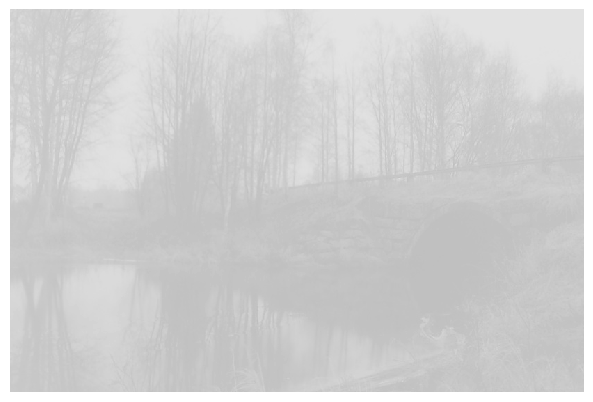

In [3]:
io.imshow(I)
plt.axis("off")

# Plotting Histogram

In [4]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

In [5]:
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

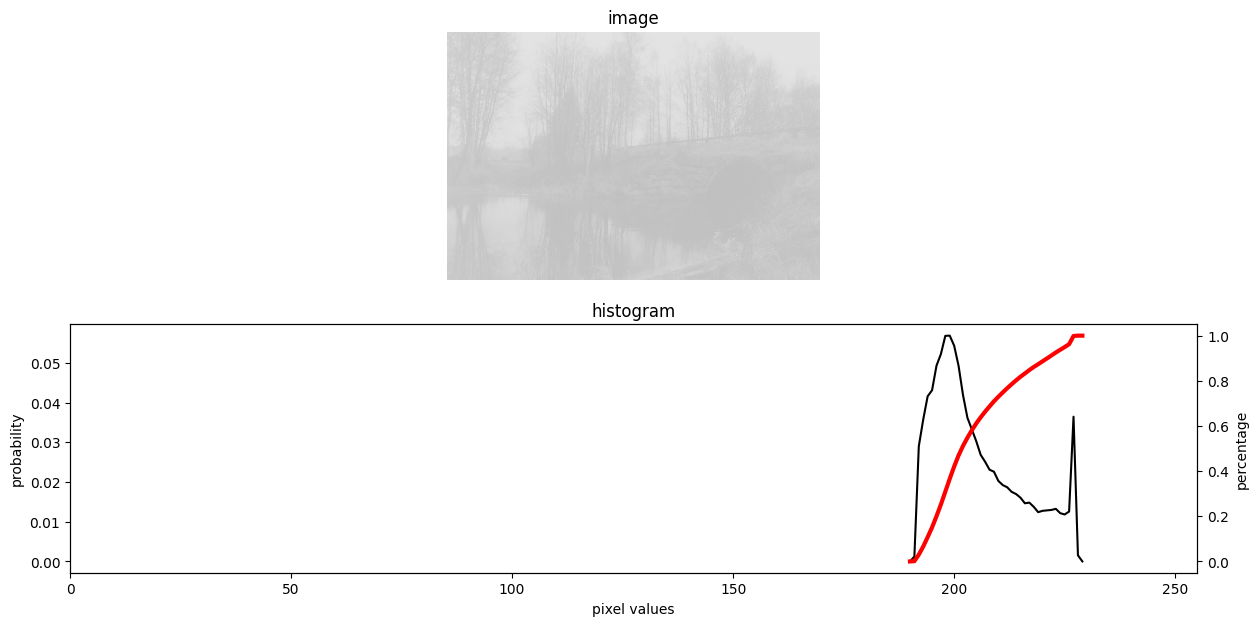

In [9]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I, normalize = True)
plt.show()

## Histogram of Color Image

In [10]:
I = io.imread("Desk.jpg")
print(I.shape)

(550, 550, 3)


(-0.5, 549.5, 549.5, -0.5)

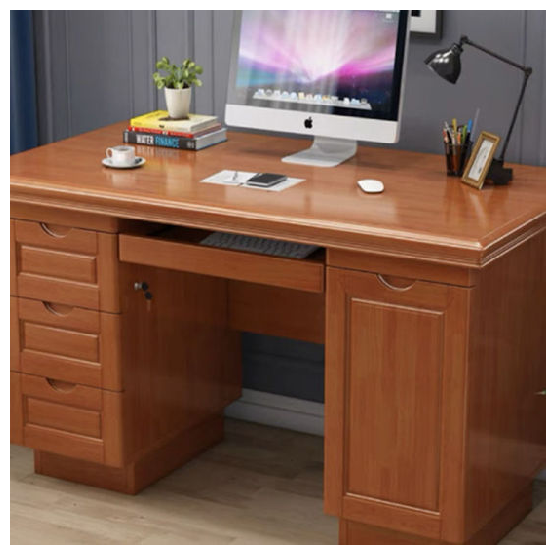

In [11]:
io.imshow(I)
plt.axis("off")

In [12]:
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])

    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

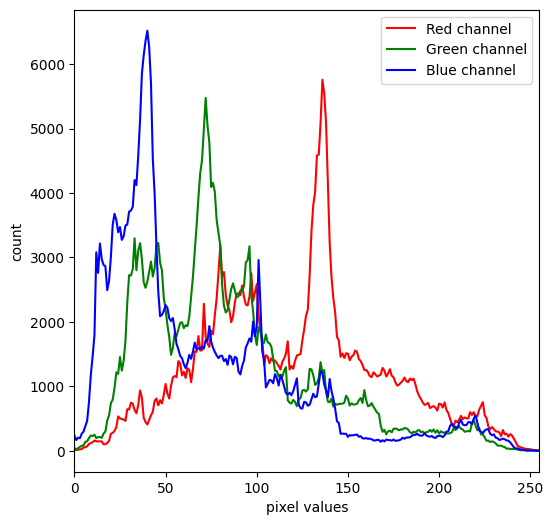

In [13]:
plot_hist_color(I)
plt.show()

Text(0.5, 1.0, 'Blue')

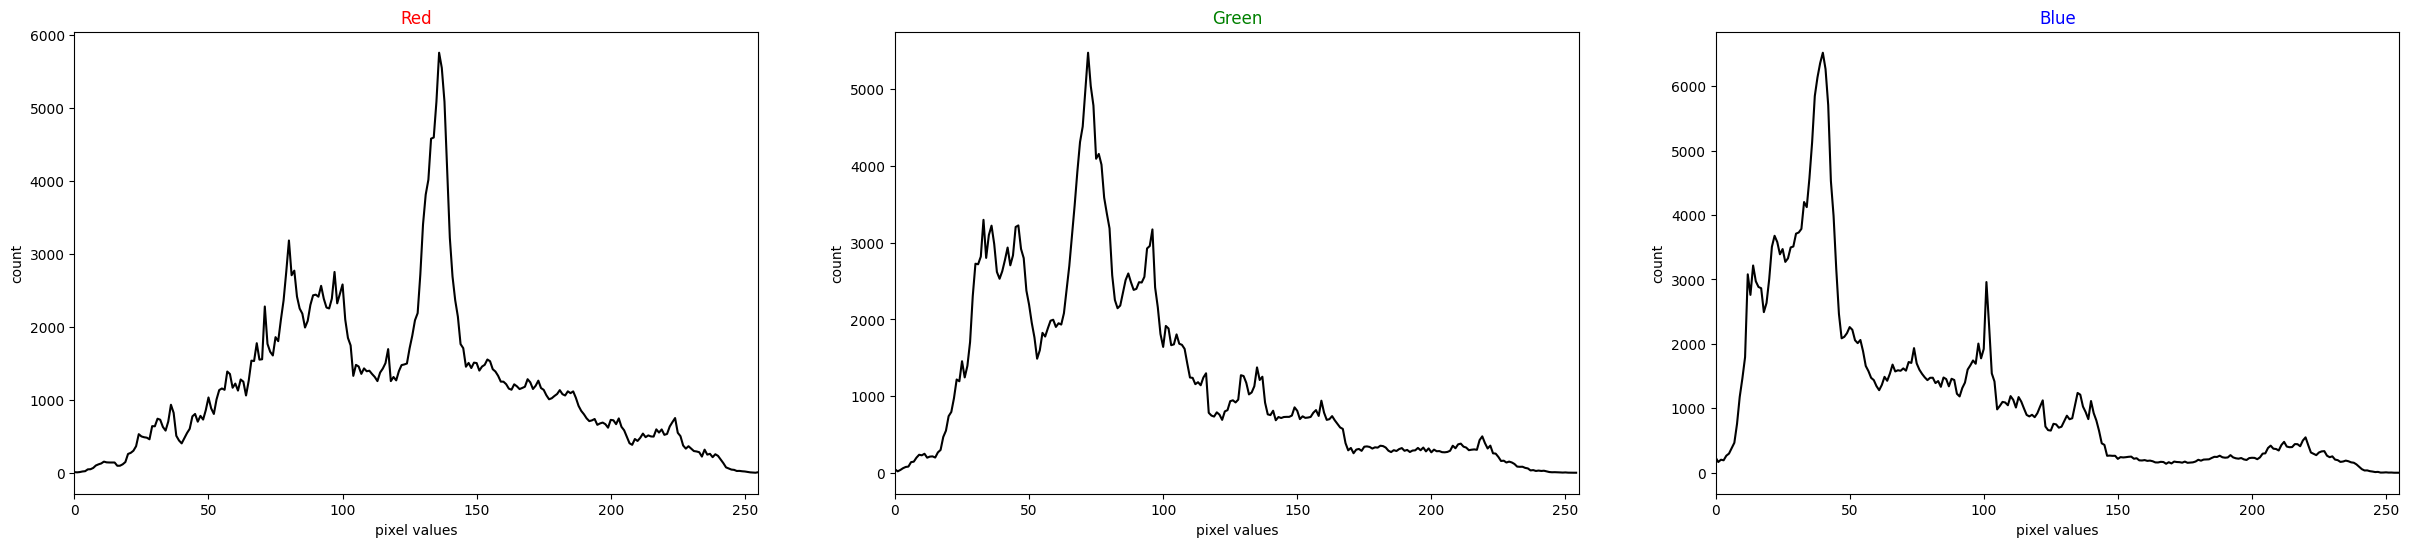

In [14]:
plt.rcParams['figure.figsize'] = (30, 6)
plt.subplot(1, 3, 1)
plot_hist(I[:, :, 0], plot_cdf=False)
plt.title("Red", color="red")

plt.subplot(1, 3, 2)
plot_hist(I[:, :, 1], plot_cdf=False)
plt.title("Green", color="green")

plt.subplot(1, 3, 3)
plot_hist(I[:, :, 2], plot_cdf=False)
plt.title("Blue", color="blue")

# Histogram Equalization

In [15]:
I = io.imread("Forest.jpeg")
I = I/255
print(I.shape)

(550, 825)


In [16]:
Ieq = exposure.equalize_hist(I)            #histogram equalizer function

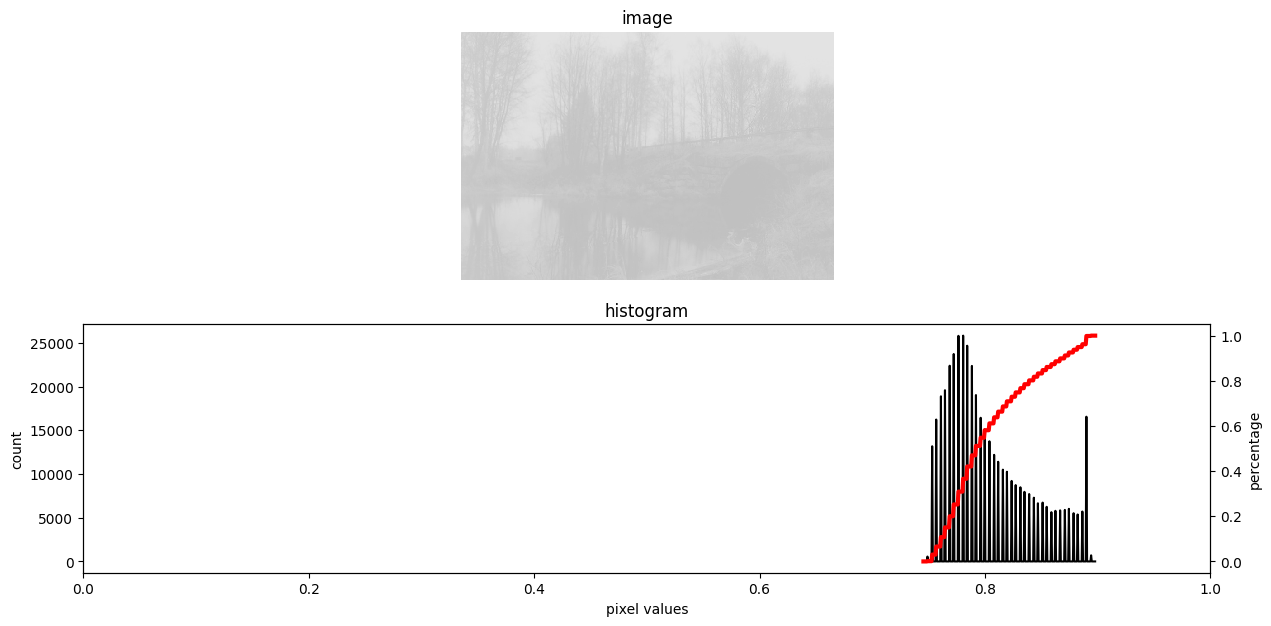

In [17]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)

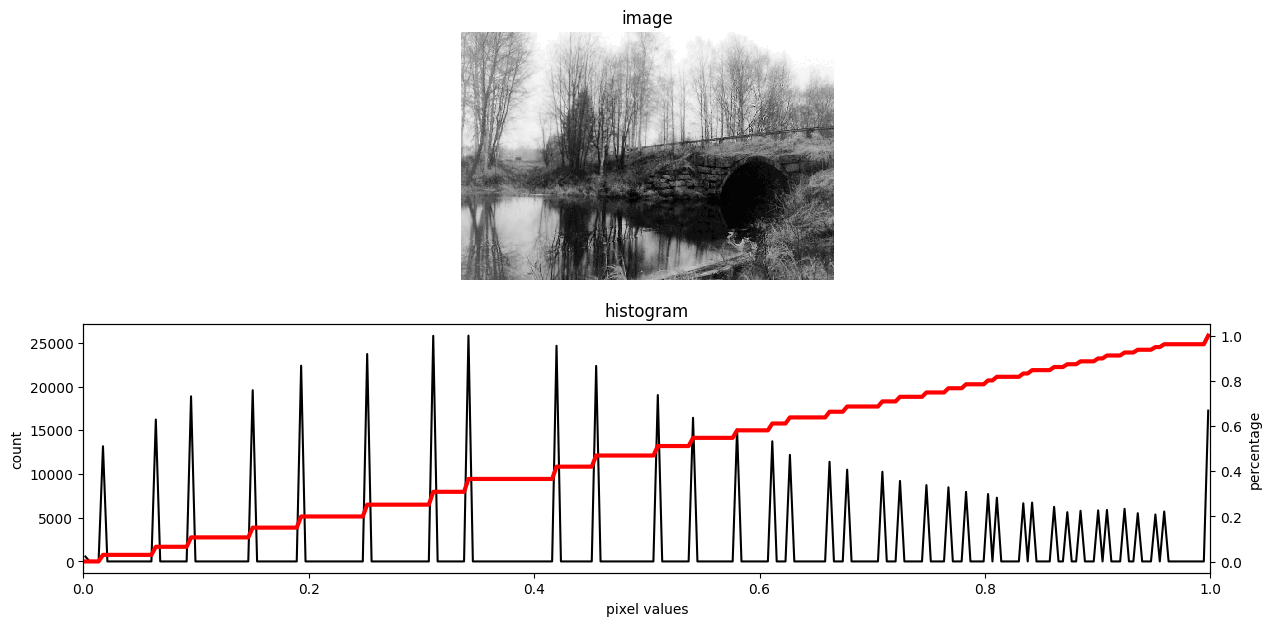

In [18]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(Ieq)

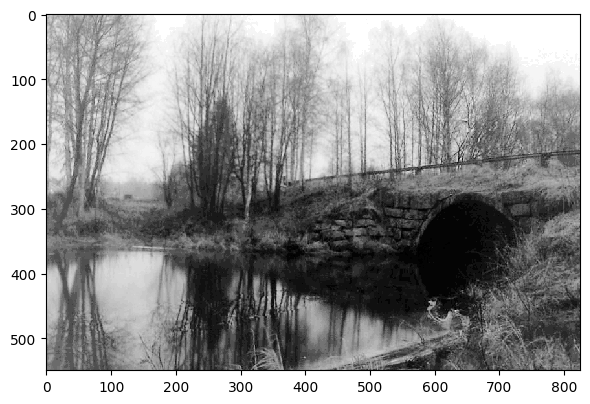

In [19]:
io.imshow(Ieq)

In [21]:
I = io.imread("Tsukuba.jpeg")
I = I/255

In [22]:
# cv2.imwrite("Tsukuba.jpeg", (I11*255).astype(int))

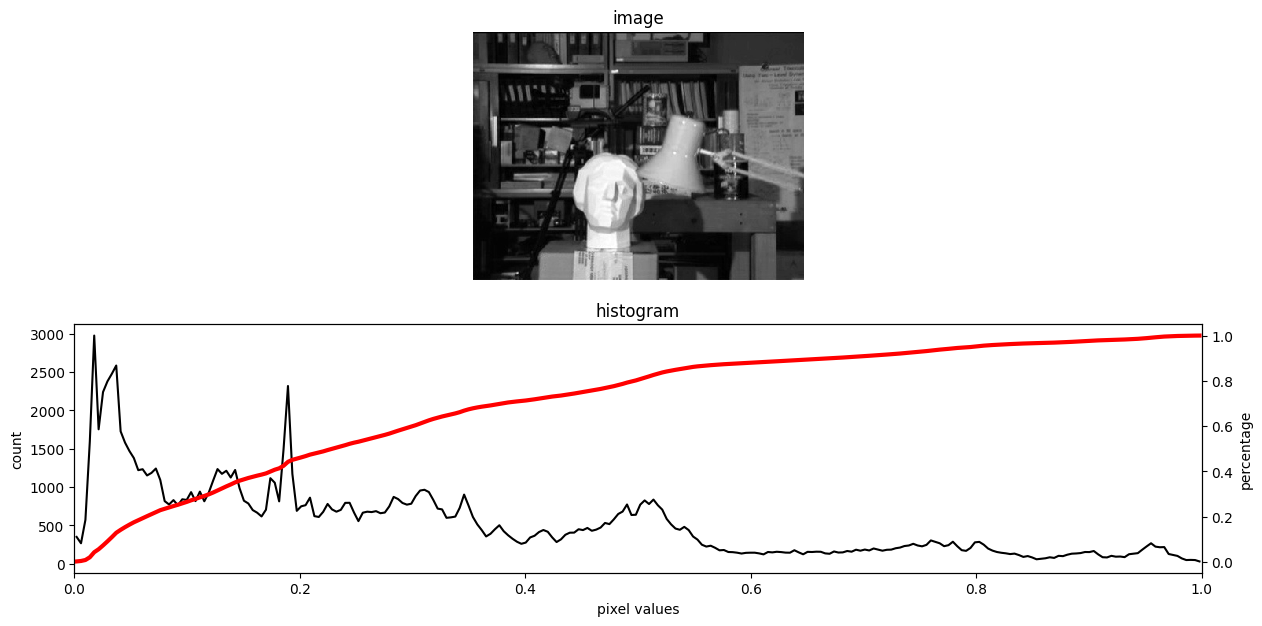

In [23]:
plot_img_and_hist(I)

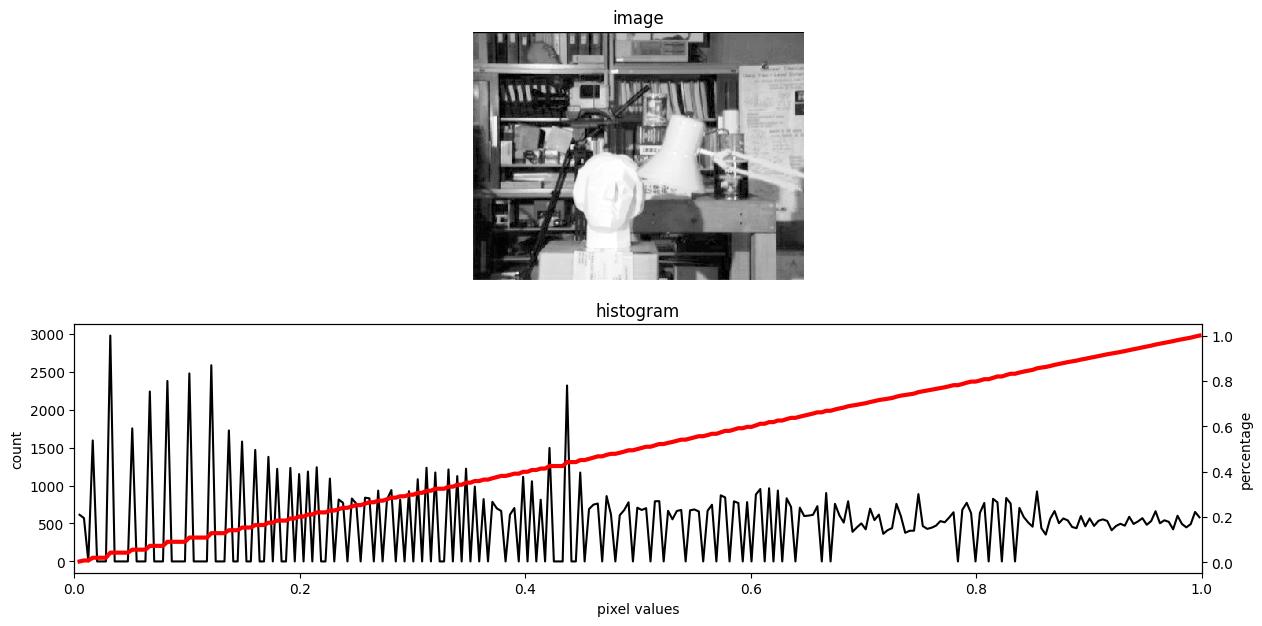

In [24]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

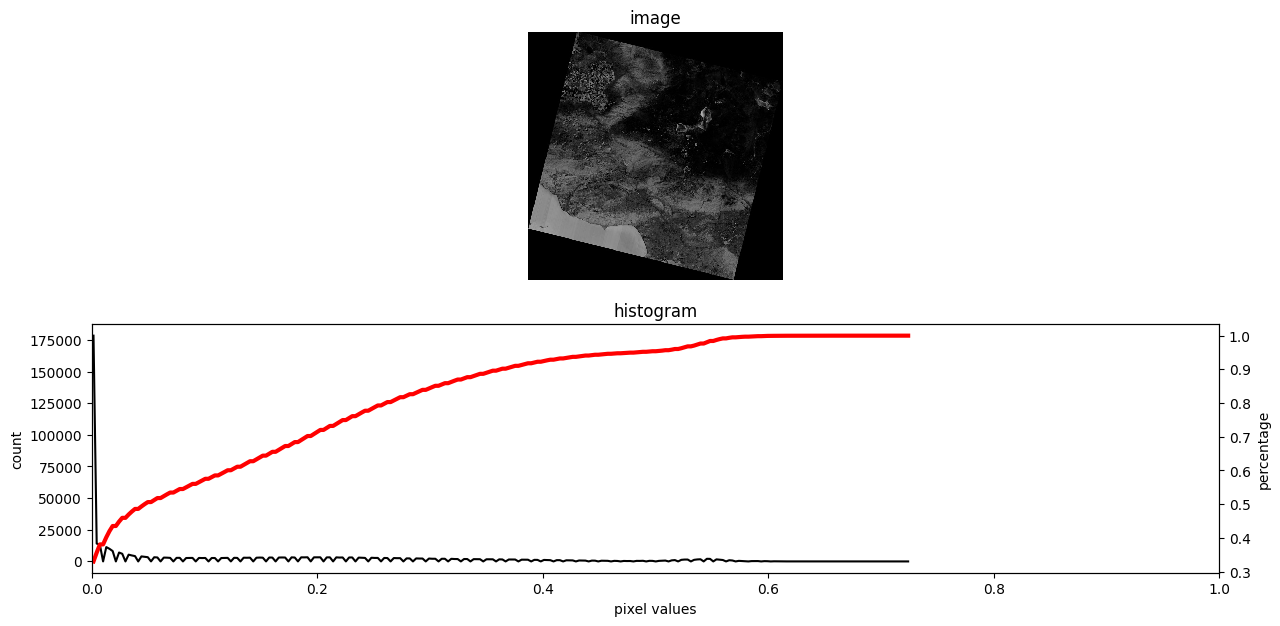

In [25]:
I = io.imread("LandSat2.jpg")
I = I/255
plot_img_and_hist(I, plot_cdf=True)

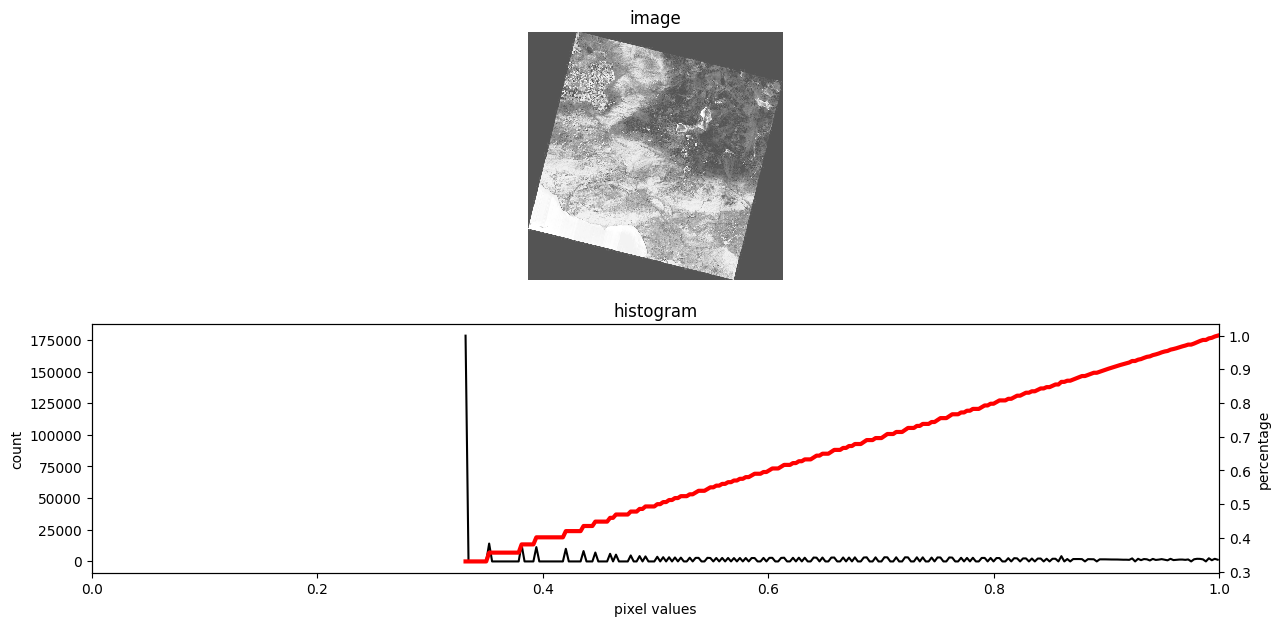

In [26]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

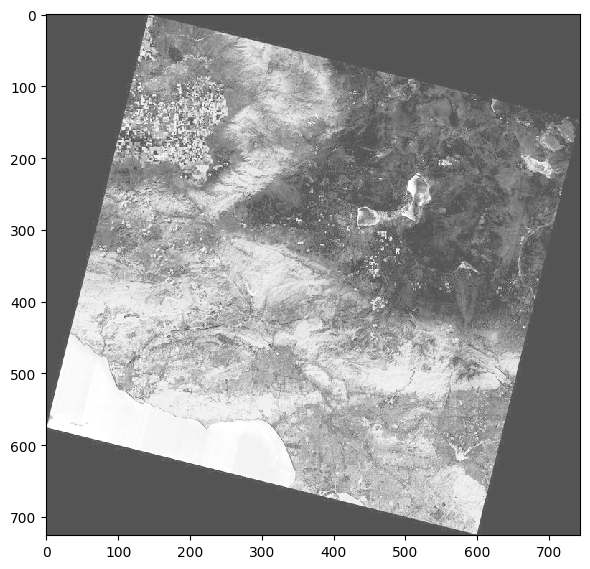

In [27]:
io.imshow(Ieq)

In [36]:
I = io.imread("Desk.jpg")
I = I/255

In [37]:
Ieq = I.copy()

#as desk image is a RGB image then we have to equalize 3 colors indivisually
Ieq[:, :, 0] = exposure.equalize_hist(I[:, :, 0])        #red color equalization
Ieq[:, :, 1] = exposure.equalize_hist(I[:, :, 1])        #green color equalization
Ieq[:, :, 2] = exposure.equalize_hist(I[:, :, 2])        #blue color equalization

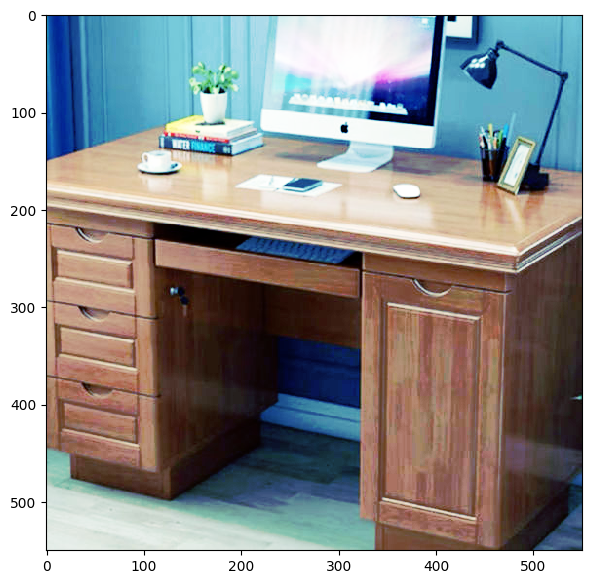

In [38]:
io.imshow(Ieq)

In [35]:
#converting image to 'L' 'a' 'b' color space
Ilab = color.rgb2lab(I)

In [33]:
print(I.shape)
print(Ilab.shape)

(550, 550, 3)
(550, 550, 3)


In [34]:
print(Ilab[:, :, 0].min())
print(Ilab[:, :, 0].max())

0.039573654069084085
99.75342383162679


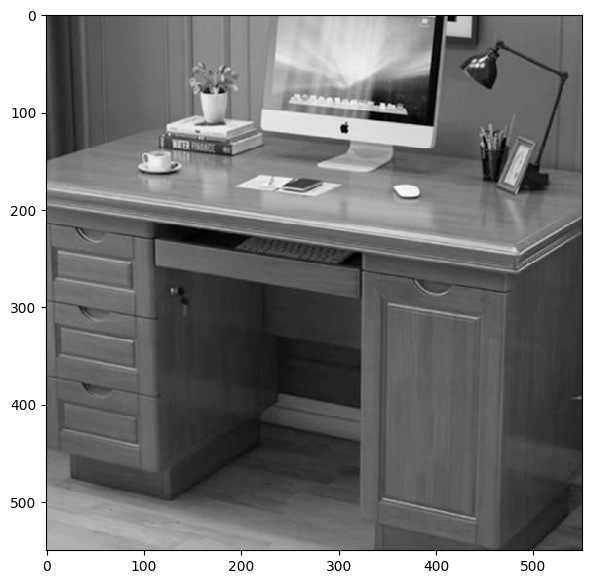

In [39]:
io.imshow(Ilab[:, :, 0]/100)

In [40]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

In [41]:
Ieq = exposure.equalize_hist(Ilab[:, :, 0])

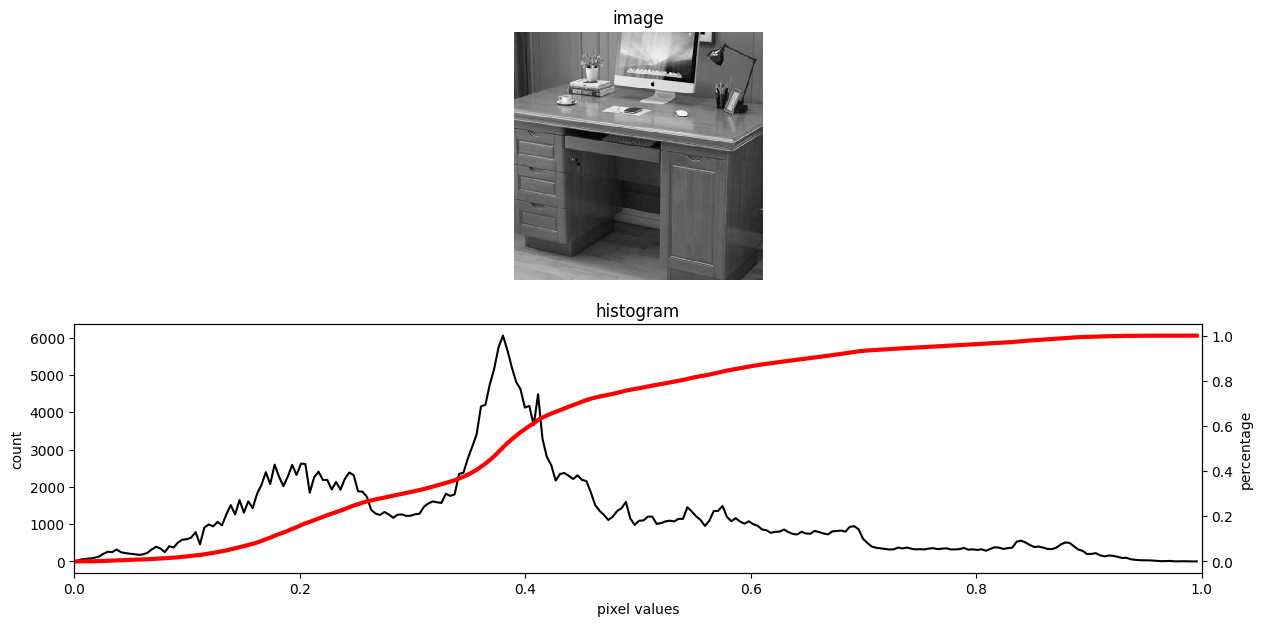

In [42]:
plot_img_and_hist(Ilab[:, :, 0])

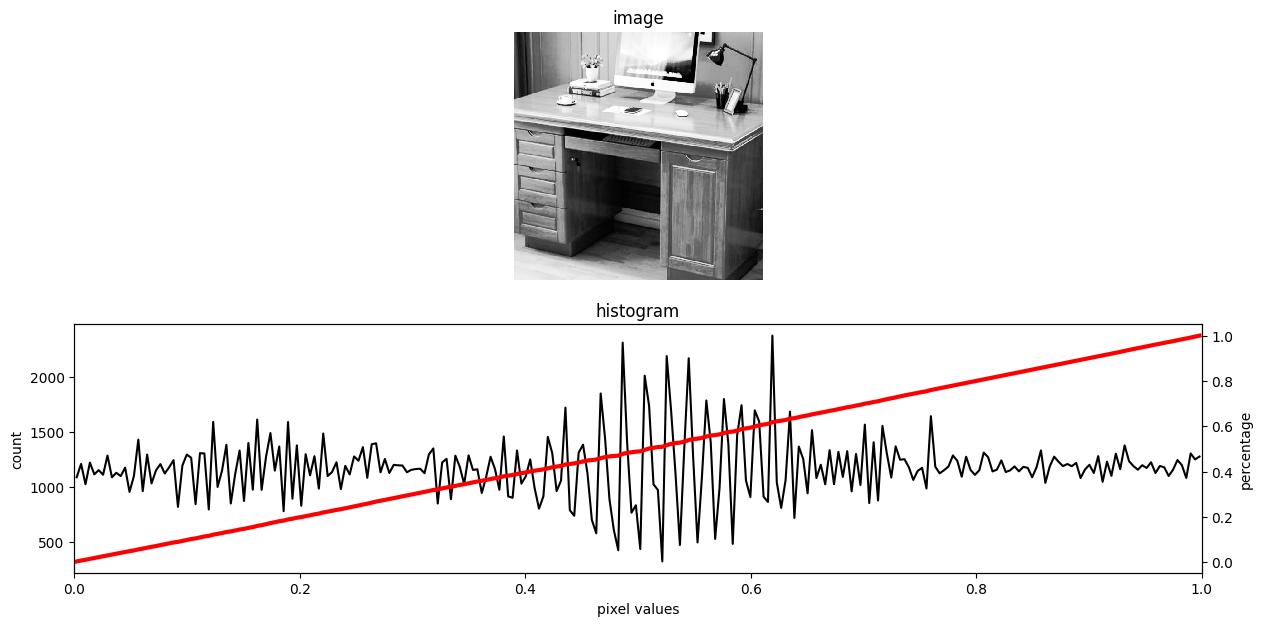

In [43]:
plot_img_and_hist(Ieq)

In [44]:
Ilab[:, :, 0] = Ieq*100

In [45]:
Irecon = color.lab2rgb(Ilab)

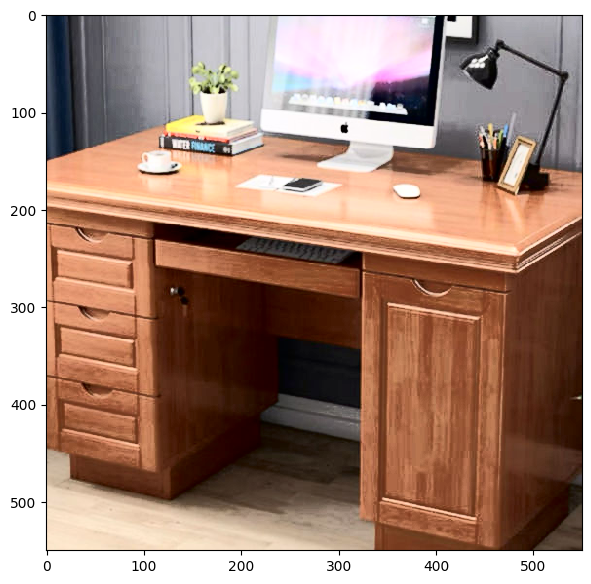

In [46]:
io.imshow(Irecon)

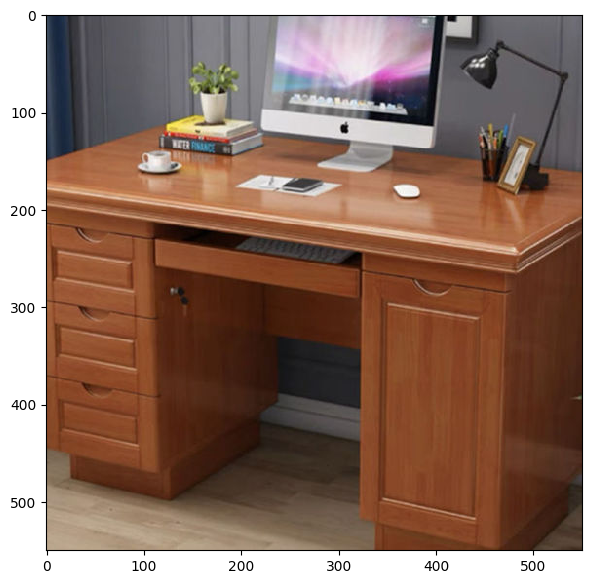

In [47]:
io.imshow(I)

# Degrading Image

In [48]:
I = io.imread("Tsukuba.jpeg")
I = I/255

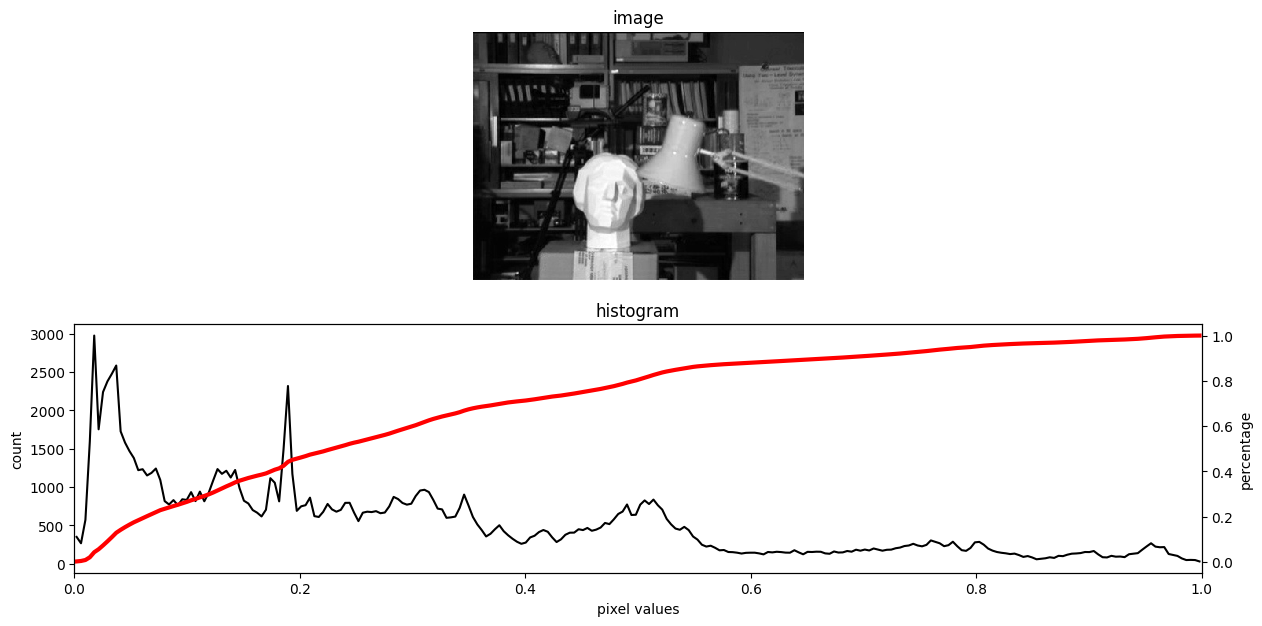

In [49]:
plot_img_and_hist(I)

In [50]:
#resacle image degree the intensity of an image
# in_range=(0,1) >> input scaled intensity range
# out_range=(0.2,0.4) >> degreed scaled intensity range

Idegraded = exposure.rescale_intensity(I, in_range=(0, 1), out_range=(0.2, 0.4))

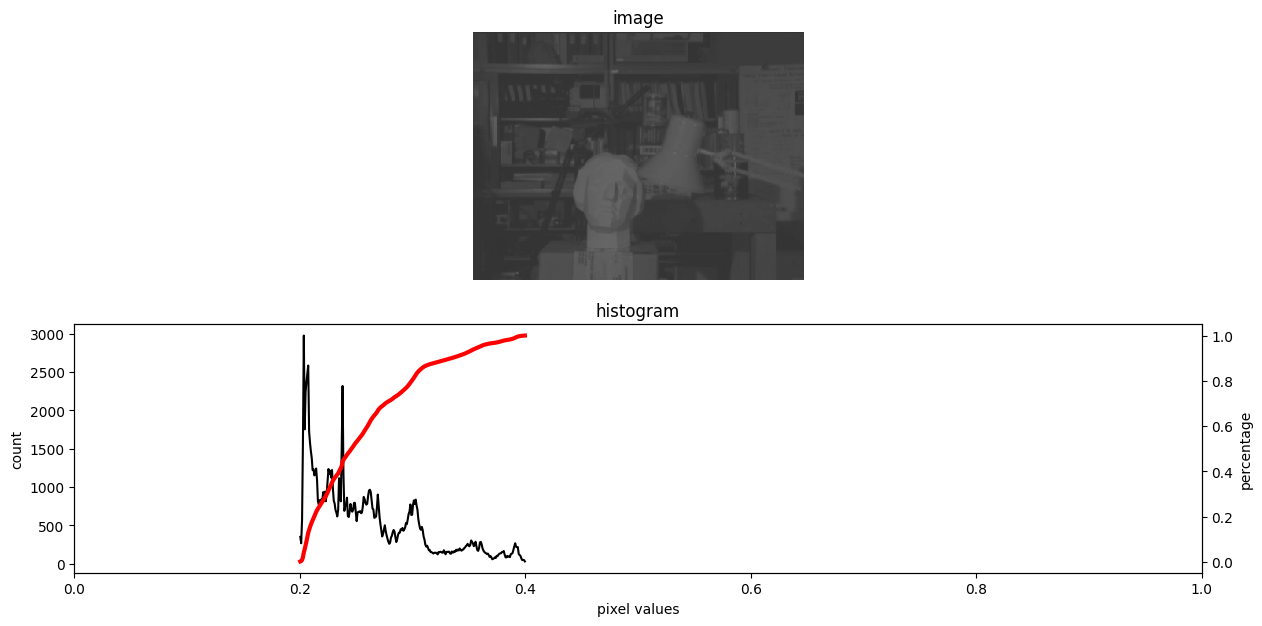

In [51]:
plot_img_and_hist(Idegraded)

In [52]:
Ieq_degraded = exposure.equalize_hist(Idegraded)


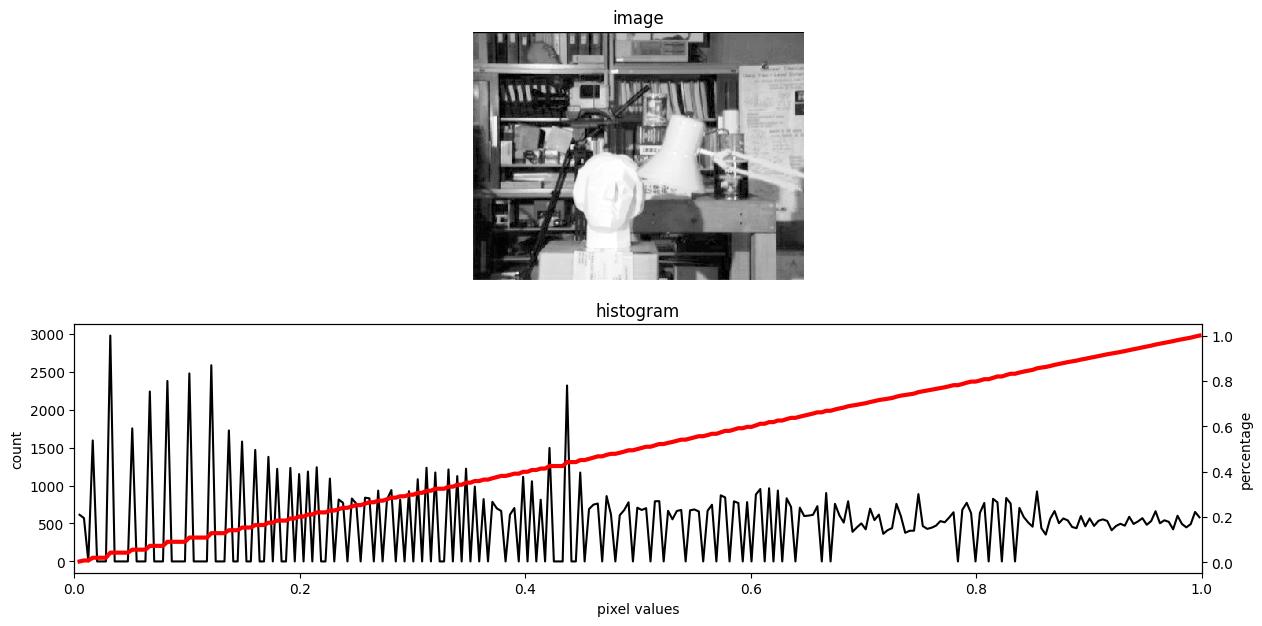

In [53]:
plot_img_and_hist(Ieq_degraded)

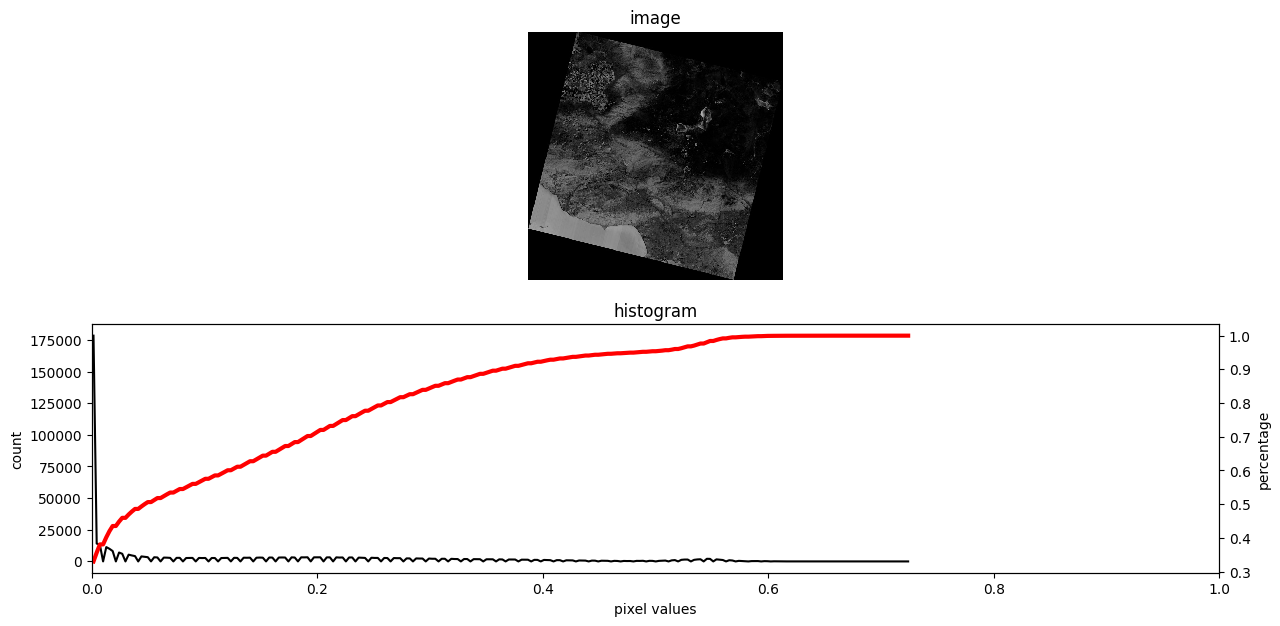

In [55]:
#practice
I = io.imread("LandSat2.jpg")
I = I/255

plot_img_and_hist(I)

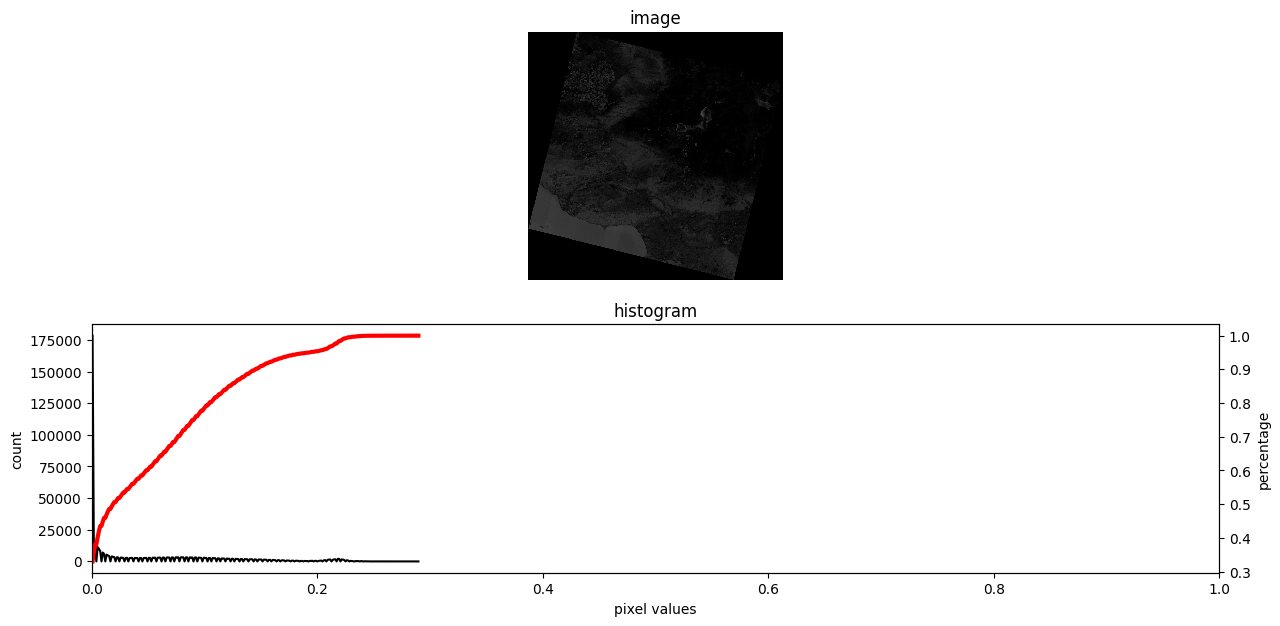

In [58]:
Idegraded = exposure.rescale_intensity(I, in_range=(0, 1), out_range=(0.0, 0.4))

plot_img_and_hist(Idegraded)

## Degrading color image

In [59]:
I = io.imread("Desk.jpg")
I = I/255

In [68]:
Ilab = color.rgb2lab(I)

In [61]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

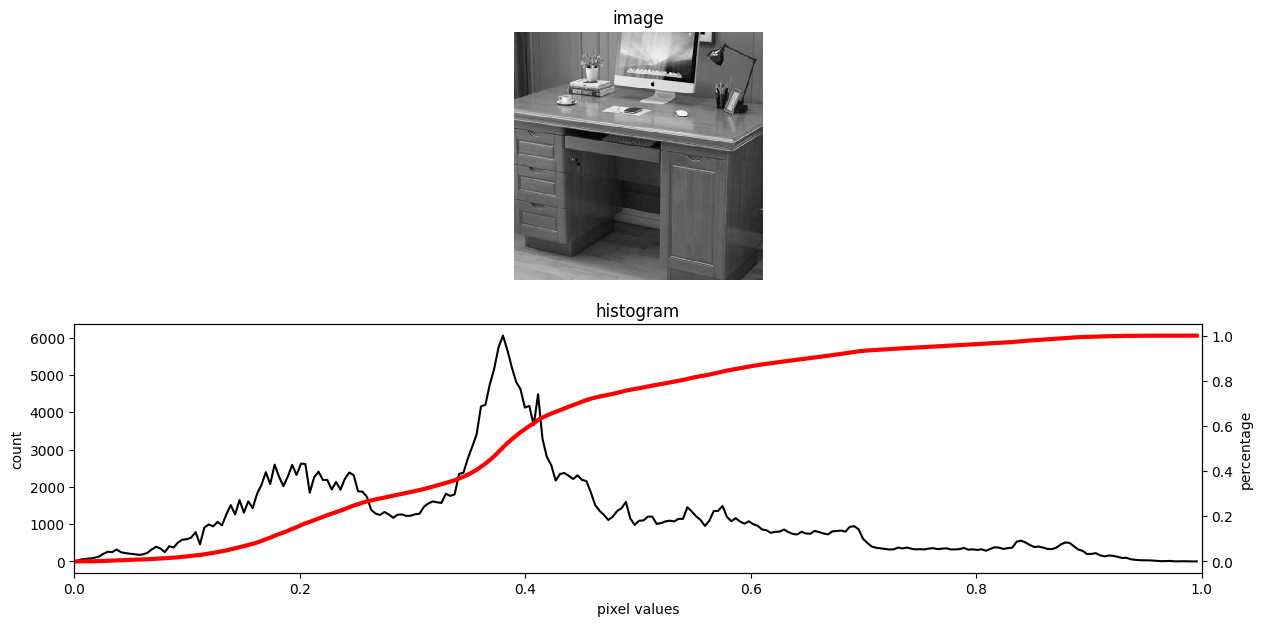

In [62]:
plot_img_and_hist(Ilab[:, :, 0])

In [63]:
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.4, 0.6))

In [64]:
Ilab[:, :, 0] = Idegraded_l*100

In [65]:
Idegraded = color.lab2rgb(Ilab)

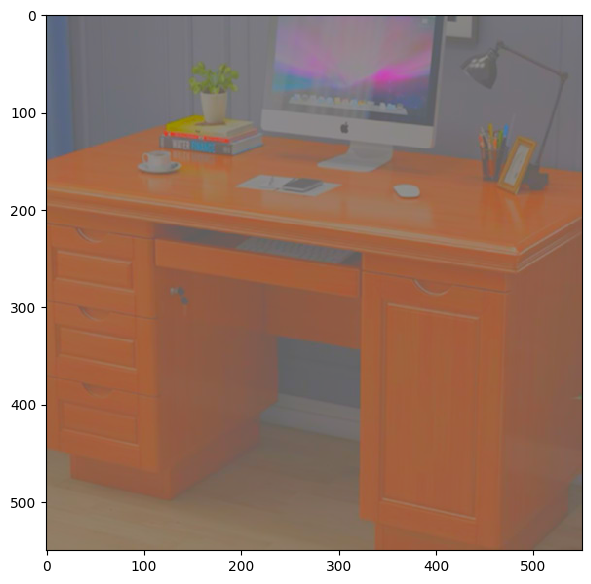

In [66]:
io.imshow(Idegraded)

# Adaptive Histogram Equalization

In [72]:
I = io.imread("Tsukuba.jpeg")
I = I/255

In [73]:
I_adapt_eq = exposure.equalize_adapthist(I, kernel_size=(128, 128), clip_limit=0)

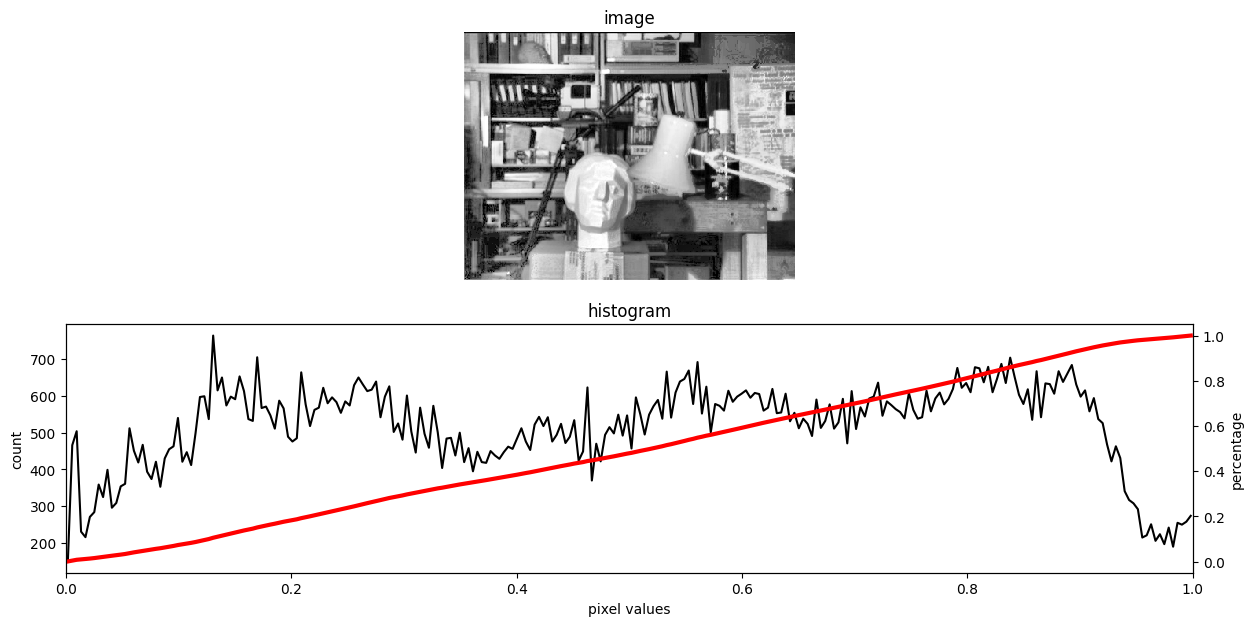

In [74]:
plot_img_and_hist(I_adapt_eq)

In [75]:
I = io.imread("moon.jpg")
I = I/255
I = color.rgb2gray(I)
# I=I[:,I.shape[1]//2:]
# I=I[:,:I.shape[1]//2]
print(I.shape)

(1000, 1000)


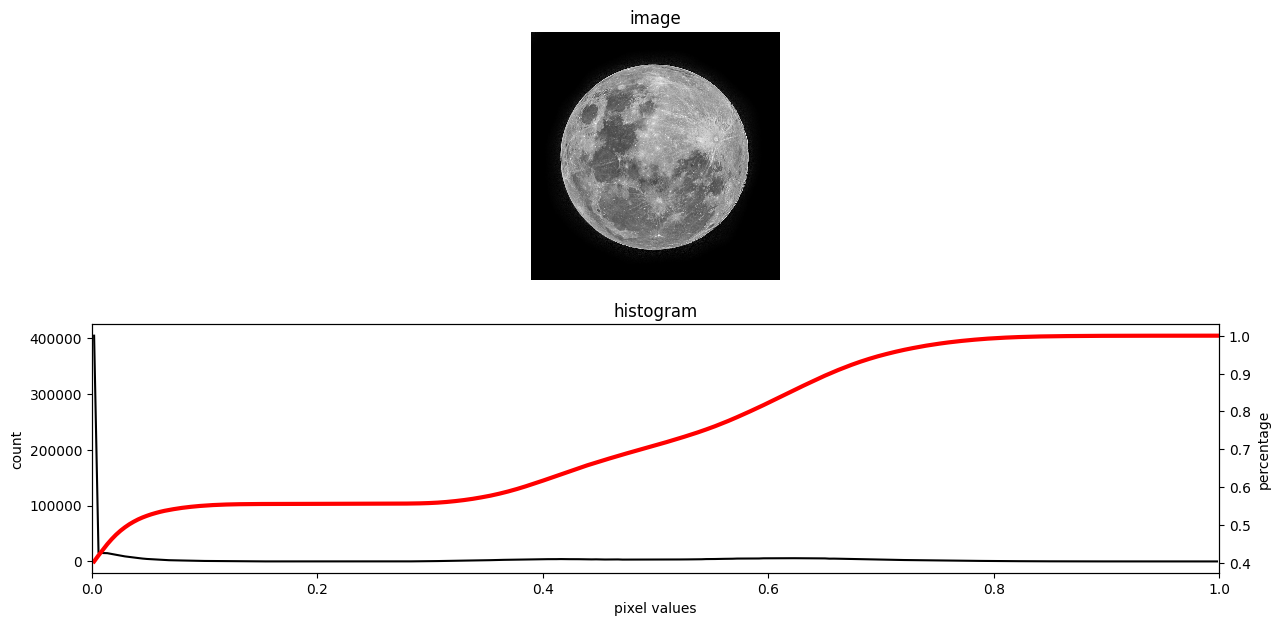

In [76]:
plot_img_and_hist(I)

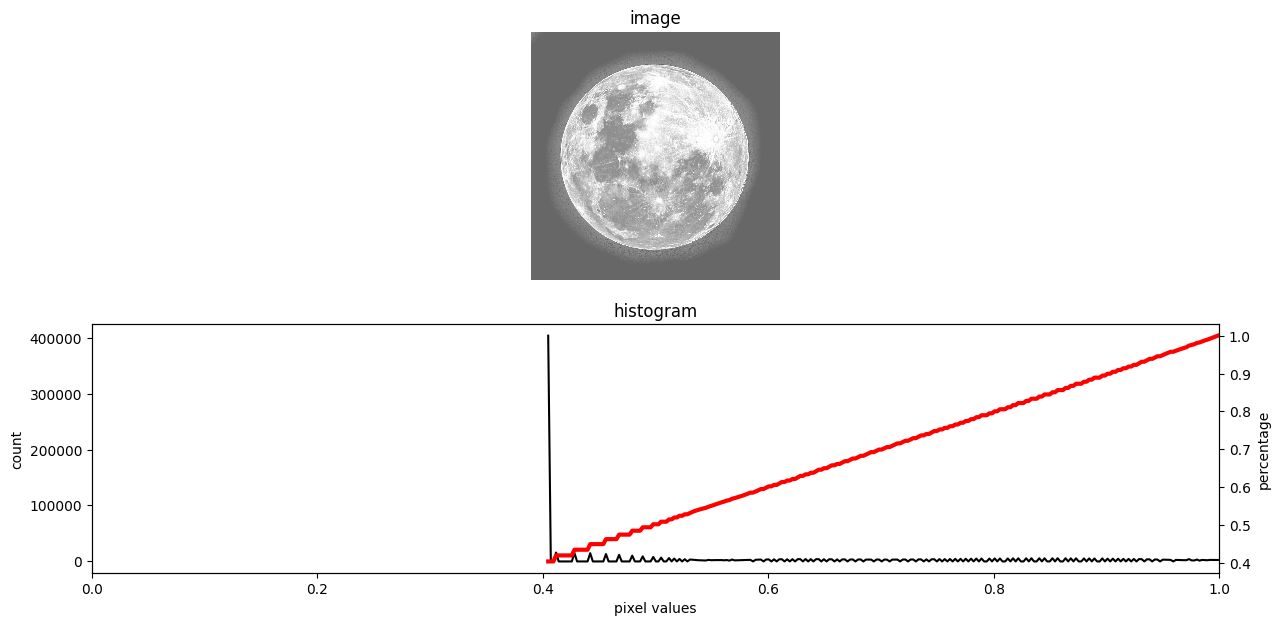

In [77]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

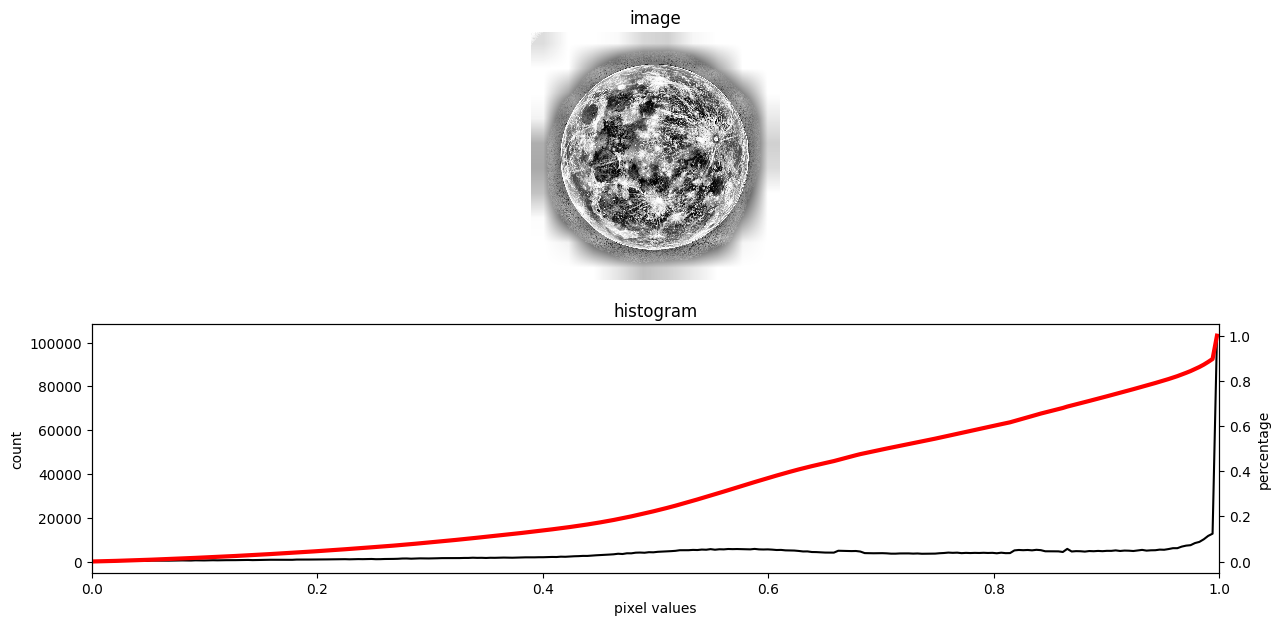

In [78]:
I_AHE = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0)
plot_img_and_hist(I_AHE)

# CLAHE

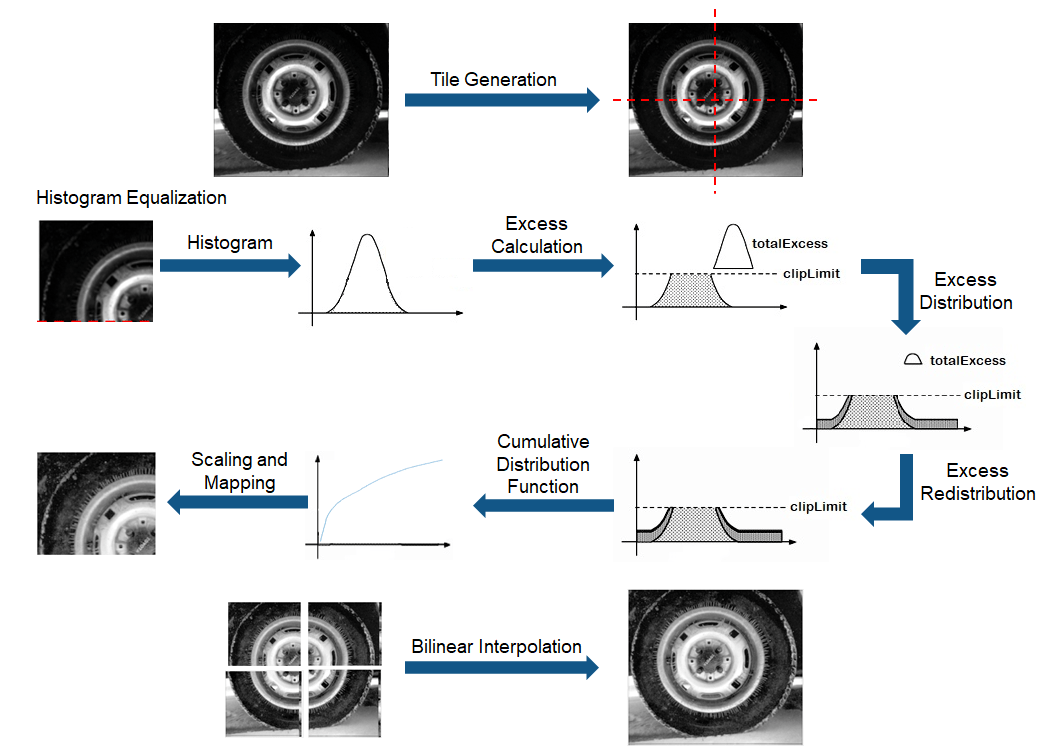

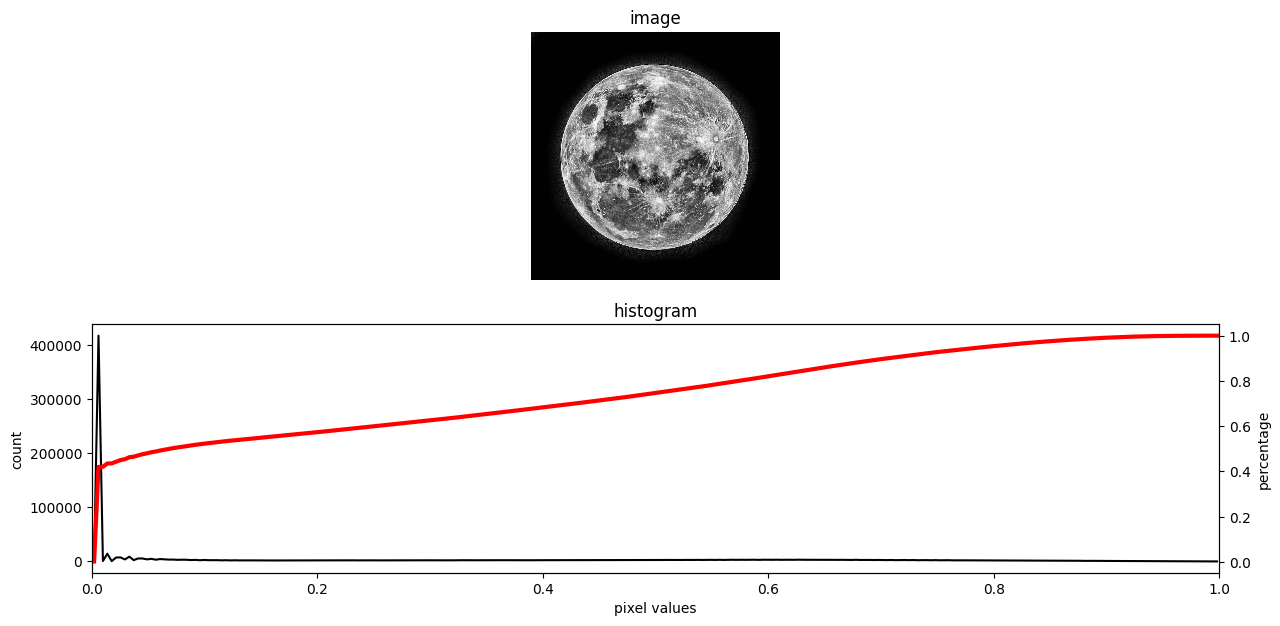

In [79]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(100, 100), clip_limit=0.01)   #clip_limit = 0.01 means CLAHE
plot_img_and_hist(I_CLAHE)

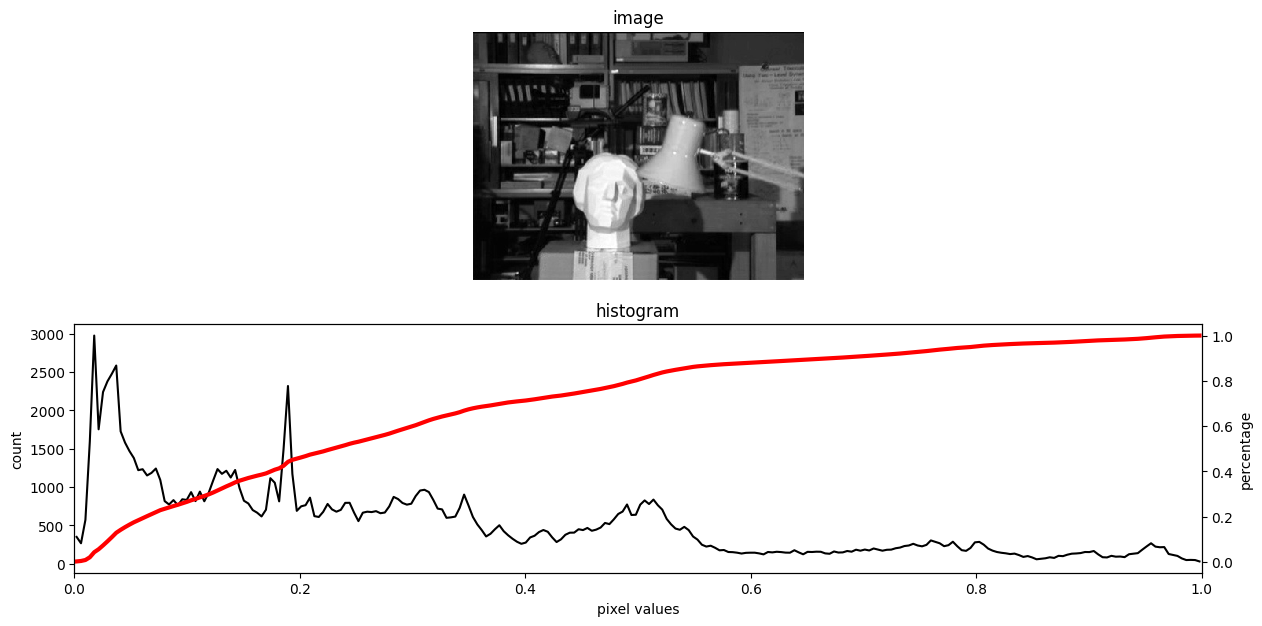

In [80]:
I = io.imread("Tsukuba.jpeg")
I = I/255
plot_img_and_hist(I)

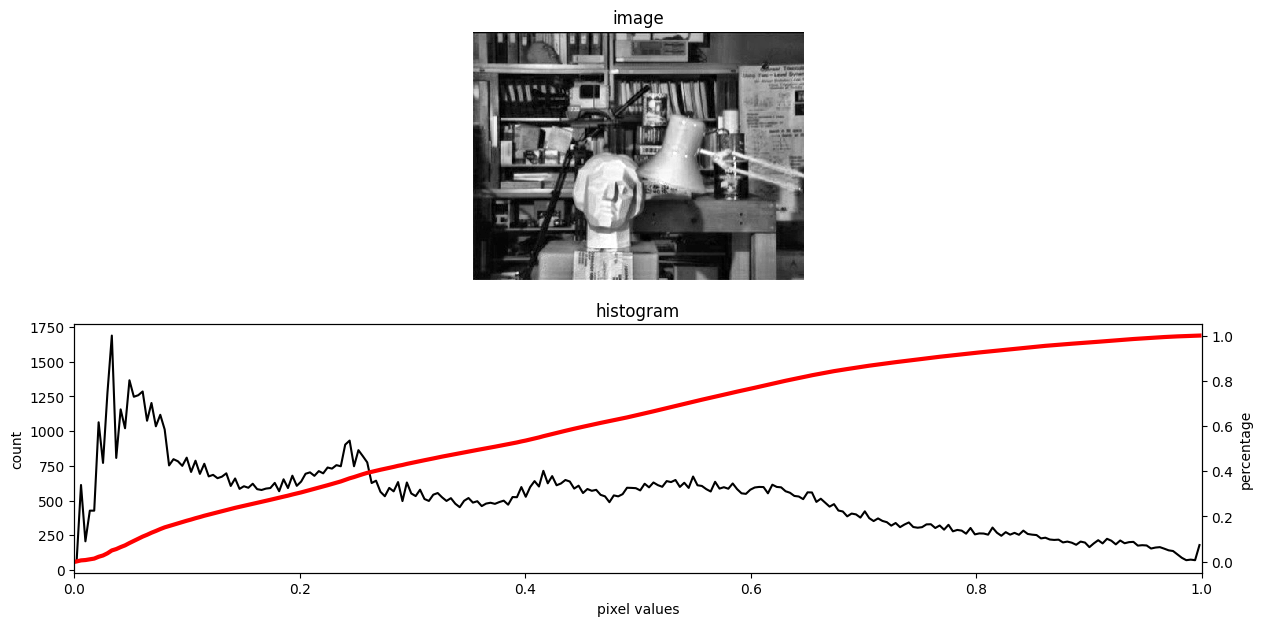

In [81]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(36, 36), clip_limit=0.01)
plot_img_and_hist(I_CLAHE)